### Imports

In [1]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
import cv2
import json

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

%matplotlib inline
sys.path.append("..")

from utils import label_map_util
from utils import visualization_utils as vis_util
from utils import path_detection_utils as path_util
from utils import data_collection_util as data_util

### Loading in model 

In [2]:
MODEL_NAME = 'ssd_mobilenet_v1_coco_11_06_2017'
MODEL_FILE = MODEL_NAME + '.tar.gz'
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'
PATH_TO_CKPT = MODEL_NAME + '/frozen_inference_graph.pb'
PATH_TO_LABELS = os.path.join('data', 'mscoco_label_map.pbtxt')
NUM_CLASSES = 90
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

### Object Detection on specific frame

In [3]:
path1 = 'video_frames/frame0.jpg'
path2 = 'video_frames/frame1.jpg'
path3 = 'video_frames/frame2.jpg'


image1 = Image.open(path1)
width1, height1 = image1.size
image_np1 = path_util.load_image_into_numpy_array(image1)
boxes1, scores1, classes1 = path_util.get_segmentation(path1,detection_graph, category_index, False)
human_boxes1, human_scores1 = path_util.remove_non_human(boxes1, scores1, classes1)
good_boxes1, good_scores1 = path_util.remove_low_prob(human_boxes1, human_scores1)
good_boxes1, good_scores1 = path_util.remove_poorly_sized_people(good_boxes1, good_scores1)

image2 = Image.open(path2)
width2, height2 = image2.size
image_np2 = path_util.load_image_into_numpy_array(image2)
boxes2, scores2, classes2 = path_util.get_segmentation(path2,detection_graph, category_index, False)
human_boxes2, human_scores2 = path_util.remove_non_human(boxes2, scores2, classes2)
good_boxes2, good_scores2 = path_util.remove_low_prob(human_boxes2, human_scores2)
good_boxes2, good_scores2 = path_util.remove_poorly_sized_people(good_boxes2, good_scores2)

image3 = Image.open(path3)
width3, height3 = image3.size
image_np3 = path_util.load_image_into_numpy_array(image3)
boxes3, scores3, classes3 = path_util.get_segmentation(path3,detection_graph, category_index, False)
human_boxes3, human_scores3 = path_util.remove_non_human(boxes3, scores3, classes3)
good_boxes3, good_scores3 = path_util.remove_low_prob(human_boxes3, human_scores3)
good_boxes3, good_scores3 = path_util.remove_poorly_sized_people(good_boxes3, good_scores3)

In [14]:
height_img = height3
width_img = width3

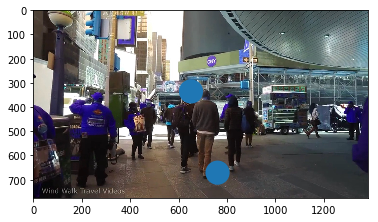

In [13]:
path_util.draw_box(good_boxes1[1], width1, height1, image_np1)

In [15]:
def get_optical_flow(path1, path2, c):
	if path2 == "end":
		return "nah"
	#print(path1)
	#print(path2)
	frame1 = cv2.imread(path1)
	frame2 = cv2.imread(path2)


	hsv = np.zeros_like(frame1)
	hsv[...,1] = 255
	prvs = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
	nxt = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)
	#print(np.shape(prvs))
	#print(np.shape(nxt))	
	#flow = cv2.calcOpticalFlowFarneback(prvs,nxt,None, 0.5,3.0,15.0,3.0,5.0,1.2,0.0)
	#flow = cv2.calcOpticalFlowFarneback(prvs,nxt, None, 0.5, 3, 15, 3, 5, 1.2, 0)
	flow = cv2.calcOpticalFlowFarneback(prvs,nxt, None, 0.5, 3, 15, 3, 7, 1.2, 0)

	#mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
	#hsv[...,0] = ang*180/np.pi/2
	#hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
	#bgr = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
	#cv2.imshow('frame2',bgr)
	#k = cv2.waitKey(30) & 0xff
	#cv2.imwrite('opticalfb'+ str(c)+ '.png',frame2)
	#cv2.imwrite('opticalhsv' + str(c)+'.png',bgr)
#prvs = next

	#print np.shape(flow)
#print("in polar")
#print mag,ang
#cap.release()
#np.savetxt("foo.csv", ang , delimiter=",")
	#cv2.destroyAllWindows()
	return flow

In [3]:
flow = get_optical_flow('video_frames/frame0.jpg', 'video_frames/frame6.jpg', 2)

NameError: name 'get_optical_flow' is not defined

In [19]:
def get_optical_flow_vector(flow, box):
	if flow == "nah":
		return "nah"
	Y_SIZE=height_img
	X_SIZE=width_img
	if flow != []:
		box = [int(box[0]*Y_SIZE),int(box[1]*X_SIZE), int(box[2]*Y_SIZE), int(box[3]*X_SIZE)]
		#print(box)
		xflow = []
		yflow = []
		for i in range(box[1],box[3]):
			for j in range(box[0],box[2]):
				xflow.append(flow[i][j][0])
				yflow.append(flow[i][j][1])
		boxflow = [xflow,yflow]
		#print boxflow
		x = np.mean(boxflow[0])
		y = np.mean(boxflow[1])
		return [x,y]
	else:
		return None

In [28]:
c = get_optical_flow_vector(flow, good_boxes1[1])

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
  


In [29]:
def bucket_vectors(vect):
	if vect == "nah":
		return "nah"
	v1 = np.array([vect[0]])
	v2 = np.array([vect[1]])
	mag, ang = cv2.cartToPolar(v1, v2, angleInDegrees = 1)
	if ang > 90 and ang < 270:
		return "left"
	else:
		return "right"

In [30]:
bucket_vectors(c)

'left'

In [3]:
#stuff = data_util.collect_data('video_frames/frame', 0, 5000,5002, detection_graph, category_index)
stuff = data_util.collect_data('video_frames/frame', 0, 1880,1880, detection_graph, category_index)

776
1384
0


utils/data_collection_util.py:174: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if flow == "nah":
utils/data_collection_util.py:198: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if flow == "nah":
utils/data_collection_util.py:229: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if vect == "nah":


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400


In [4]:
count_diff = 0
count_total = 0
for i in range(len(stuff[0])):
    thing = stuff[0][i]
    if thing['direction'] is not thing['direction2']:
        count_diff+=1
    count_total+=1
print(count_diff)
print(count_total)    

1040
27425


In [5]:
with open('M_3_labels.json', 'w') as fp:
    json.dump(stuff[1], fp)

In [6]:
stuff2 = []
for i in stuff[0]:
    entry = i
    entry['box'] = entry['box'].tolist()
    #entry['flow'] = entry['flow'].tolist()
    try:
        entry['flow'] = [float(i) for i in entry['flow']]
        entry['flow2'] = [float(i) for i in entry['flow2']]
    except:
        entry['flow'] = [-10.0, -10.0]
        entry['flow2'] = [-10.0, -10.0]
    stuff2.append(entry)

In [7]:
with open('M_3_2_everything.json', 'w') as fp:
    json.dump(stuff2, fp)

In [10]:
with open('M_1_everything.json') as data_file:    
    all_data = json.load(data_file)

In [11]:
with open('M_1_labels.json') as data_file:    
    all_data_labels = json.load(data_file)

In [12]:
person_to_boxes = defaultdict(list)
person_to_flow = defaultdict(list)
person_to_flow_x = defaultdict(list)
for entry in all_data:
    if all_data_labels[str(entry['person_id'])] != "unknown":
        person_to_boxes[entry['person_id']].append(entry['box'])
        person_to_flow[entry['person_id']].append((entry['direction'], entry['direction2']))
        person_to_flow_x[entry['person_id']].append((entry['flow'][0], entry['flow2'][0]))

In [13]:
correct = 0
total = 0
incorrect1 = []
for i in person_to_boxes:
    label = all_data_labels[str(i)][0]
    box = person_to_boxes[i][0]
    center_x = (box[3]+box[1])/2.0
    if center_x < 0.5 and label == "l":
        correct+=1
    elif center_x >=0.5 and label == "r":
        correct+=1
    else:
        incorrect1.append(i)
    total+=1
print(correct/ (1.0*total))
print(total)
print(incorrect1)

0.636645962733
322
[2576, 531, 534, 2530, 2076, 1567, 1571, 2081, 38, 1576, 1578, 1582, 561, 1588, 53, 1590, 568, 1596, 574, 1087, 2428, 780, 2123, 1613, 1605, 2111, 1623, 2643, 615, 1646, 2599, 624, 1651, 1653, 2173, 277, 1664, 1666, 1669, 648, 2698, 2190, 655, 1168, 1180, 2085, 1705, 1706, 689, 2590, 2083, 2774, 1487, 2394, 733, 380, 2087, 2285, 2088, 2290, 2291, 2292, 2294, 1783, 2175, 2702, 266, 785, 789, 2848, 801, 2891, 299, 815, 818, 1391, 1341, 1342, 2880, 2373, 338, 1148, 342, 2020, 2397, 2143, 1339, 361, 1388, 2418, 1581, 375, 381, 1406, 1411, 2894, 2444, 2448, 2400, 2456, 2460, 2289, 2674, 951, 441, 2093, 2007, 1891, 1500, 2022, 487, 1512, 1514, 1520, 1524, 1530, 2551]


In [14]:
correct = 0
total = 0
incorrect2 = []
for i in person_to_flow:
    label = all_data_labels[str(i)][0]
    if person_to_flow_x[i][0][0] <= 0 and label == "l":
        correct+=1
    elif person_to_flow_x[i][0][0] > 0 and label == "r":
        correct+=1
    else:
        incorrect2.append(i)
    total+=1
print(correct/ (1.0*total))
print(incorrect2)

0.599378881988
[1541, 2131, 2576, 2065, 531, 534, 2530, 2076, 1565, 1571, 2081, 38, 1575, 1576, 1578, 1582, 561, 1588, 53, 1590, 568, 1596, 574, 1087, 1600, 1601, 2428, 780, 2123, 1622, 1613, 1605, 2111, 1618, 1623, 2404, 615, 1646, 1651, 1653, 2173, 277, 1664, 1666, 2691, 1669, 2694, 648, 2190, 655, 1168, 2711, 2085, 1705, 1706, 689, 2083, 2774, 1487, 733, 2087, 2285, 2088, 2290, 2291, 1783, 2702, 266, 785, 789, 2848, 801, 2891, 299, 815, 2107, 818, 1391, 822, 1341, 1342, 2880, 836, 2373, 1871, 338, 1148, 342, 2020, 1370, 2397, 354, 1339, 1892, 871, 361, 1388, 2418, 1581, 374, 375, 1598, 381, 1406, 1411, 391, 2444, 2448, 918, 2456, 2460, 1804, 1607, 2674, 951, 441, 2093, 2007, 1891, 482, 487, 1512, 2538, 1514, 493, 1520, 1524, 1530, 2551]


In [15]:
person_to_flow

defaultdict(list,
            {38: [(u'right', u'right'),
              (u'right', u'right'),
              (u'right', u'right'),
              (u'right', u'right'),
              (u'right', u'right'),
              (u'right', u'right'),
              (u'right', u'right'),
              (u'right', u'right'),
              (u'right', u'right'),
              (u'right', u'right')],
             53: [(u'right', u'right'),
              (u'right', u'right'),
              (u'right', u'right'),
              (u'right', u'right'),
              (u'right', u'right'),
              (u'right', u'right'),
              (u'right', u'right'),
              (u'right', u'right'),
              (u'right', u'right'),
              (u'right', u'right'),
              (u'right', u'right'),
              (u'right', u'right'),
              (u'right', u'right'),
              (u'right', u'right'),
              (u'right', u'right'),
              (u'right', u'right'),
              (u'right', u'right'),
 

In [16]:
person_to_flow_x[i]

[(13.405344009399414, 9.688173294067383),
 (12.185699462890625, 10.317773818969727)]

In [17]:
person_to_flow[i]

[(u'right', u'right'), (u'right', u'right')]

In [18]:
correct = 0
total = 0
incorrect2 = []
for i in person_to_flow:
    label = stuff[1][i][0]
    if person_to_flow_x[i][0] <= 0 and label == "l":
        correct+=1
    elif person_to_flow_x[i][0] > 0 and label == "r":
        correct+=1
    else:
        incorrect2.append(i)
    total+=1
print(correct/ (1.0*total))
print(incorrect2)

0.239130434783
[1025, 2050, 1541, 2131, 2576, 2065, 1042, 531, 533, 534, 535, 2530, 2076, 1565, 2415, 1567, 1456, 1571, 2081, 38, 1575, 1576, 1578, 2604, 1458, 1582, 1584, 561, 2611, 1588, 53, 1590, 2313, 568, 1596, 574, 1087, 1600, 1601, 581, 2428, 583, 780, 2123, 1622, 1613, 1605, 2111, 1618, 1623, 2140, 2643, 2142, 1382, 615, 2892, 1646, 2599, 624, 2162, 1651, 1653, 121, 636, 2173, 277, 1664, 1666, 2691, 1669, 2694, 648, 1161, 2698, 2613, 2190, 655, 1168, 2195, 2511, 667, 1180, 2085, 673, 2331, 1705, 1706, 171, 685, 689, 2590, 2505, 1397, 1839, 1933, 2250, 1400, 2083, 2774, 217, 1487, 2394, 733, 223, 2276, 2612, 380, 2087, 2285, 2088, 2290, 2291, 2292, 2294, 1783, 2175, 2702, 2893, 258, 259, 263, 1289, 266, 268, 1295, 785, 1299, 789, 2327, 2328, 1305, 1819, 2848, 801, 2523, 2109, 2524, 2891, 299, 815, 818, 1391, 1844, 1845, 822, 2697, 1848, 313, 1341, 1342, 1855, 2880, 322, 836, 2373, 2365, 1357, 2616, 338, 1363, 1148, 1365, 342, 1367, 2020, 1372, 2397, 2143, 354, 1339, 871, 361, 18

In [19]:
s1 = set(incorrect1)
s2 = set(incorrect2)
s1&s2

{38,
 53,
 266,
 277,
 299,
 338,
 342,
 361,
 375,
 380,
 381,
 441,
 487,
 531,
 534,
 561,
 568,
 574,
 615,
 624,
 648,
 655,
 689,
 733,
 780,
 785,
 789,
 801,
 815,
 818,
 951,
 1087,
 1148,
 1168,
 1180,
 1339,
 1341,
 1342,
 1388,
 1391,
 1406,
 1411,
 1487,
 1500,
 1512,
 1514,
 1520,
 1524,
 1530,
 1567,
 1571,
 1576,
 1578,
 1581,
 1582,
 1588,
 1590,
 1596,
 1605,
 1613,
 1623,
 1646,
 1651,
 1653,
 1664,
 1666,
 1669,
 1705,
 1706,
 1783,
 1891,
 2007,
 2020,
 2022,
 2076,
 2081,
 2083,
 2085,
 2087,
 2088,
 2093,
 2111,
 2123,
 2143,
 2173,
 2175,
 2190,
 2285,
 2289,
 2290,
 2291,
 2292,
 2294,
 2373,
 2394,
 2397,
 2400,
 2418,
 2428,
 2444,
 2448,
 2456,
 2460,
 2530,
 2551,
 2576,
 2590,
 2599,
 2643,
 2674,
 2698,
 2702,
 2774,
 2848,
 2880,
 2891,
 2894}